# Economic Data Engineering & Analyses

The purpose of this notebook is to illustrate a typical data engineering task. This task involves data extraction, transformation, and loading (ETL). The complexity of the data engineering pipeline depends on the structure of the data, storage options, and the tools/frameworks used.

In this simple demo, the raw data exists in various Excel files, each with its own format and style. Therefore, each file must be extracted, cleaned, and transformed before meaningful analyses can be conducted. In some cases, the cleaned and transformed data can be stored in data warehouses or data marts for subsequent analyses.

## Import Libraries & Data Extraction

To keep things simple, we assume that the raw data is stored locally. In real cases, it may be stored in cloud storage solutions such as S3, Data Lakes, or Data Warehouses.

Since the size of the data is relatively small, we don't need to use distributed dataframes such as Spark; we will simply use a Pandas dataframe.

In [62]:
import pandas as pd # dataframe
import seaborn as sns # plotting
import matplotlib.pyplot as plt # fancy plotting

Reading some excels from local disk using **read_excel**. In this case, we read 5 excel files and parse them into their respective dataframe.

In [63]:
unemployment = pd.read_excel(r'data_lake\Unemployment Rate.xlsx',sheet_name='annual')
#total_reserves = pd.read_excel(r'data_lake\Total Reserves.xlsx',sheet_name='annual')
industrial_production = pd.read_excel(r'data_lake\Industrial Production.xlsx',sheet_name='annual')
gdp = pd.read_excel(r'data_lake\GDP.xlsx',sheet_name='annual')

Show the last 5 rows of each dataframe.

In [64]:
unemployment.tail(5)

,Unnamed: 0,Argentina,Developing Asia,Australia,Austria,Belgium,Bulgaria,Bahrain,Belarus,Brazil,...,Thailand,Tunisia,Turkey,"Taiwan, China",Uruguay,United States,"Venezuela, RB",Vietnam,World (WBG members),South Africa
26,2015.0,6.616998,5.784010,6.056649,9.103357,8.508295,10.060830,3.5,0.913436,8.304313,...,0.883333,15.22209,10.30000,3.785833,7.533333,5.275000,6.832846,2.33,6.613514,25.34028
27,2016.0,8.476372,5.552512,5.709696,9.061413,7.861191,8.685833,4.3,1.013323,11.280350,...,0.987500,15.49771,10.90833,3.920833,7.858333,4.875000,NaN,2.30,6.511802,26.70807
28,2017.0,8.351426,5.836821,5.571649,8.510407,7.096795,7.198333,NaN,0.762540,12.763480,...,1.176667,15.34873,10.91667,3.760833,7.933333,4.350000,NaN,2.24,6.573550,27.42473
29,2018.0,9.246405,NaN,5.301193,7.703909,5.959345,6.173333,NaN,0.414411,12.257640,...,1.062500,15.44971,10.99167,3.707500,8.358333,3.891667,NaN,NaN,6.236475,27.11565
30,2019.0,NaN,NaN,5.035967,7.393715,NaN,5.580000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.800000,NaN,NaN,NaN,NaN


In [65]:
industrial_production.tail(5)

,Unnamed: 0,Argentina,Developing Asia,Austria,Belgium,Bangladesh,Bulgaria,Bosnia and Herzegovina,Belarus,Brazil,...,Sweden,Thailand,Tunisia,Turkey,Uganda,Ukraine,Uruguay,United States,World (WBG members),South Africa
25,2015.0,9.400000e+10,6.180000e+12,1.170000e+11,1.070000e+11,5.220000e+10,1.370000e+10,4.190000e+09,1.110000e+11,4.640000e+11,...,1.280000e+11,1.490000e+11,1.180000e+10,2.990000e+11,4.610000e+09,2.900000e+10,1.180000e+10,3.360000e+12,1.870000e+13,1.110000e+11
26,2016.0,9.070000e+10,6.540000e+12,1.200000e+11,1.120000e+11,5.900000e+10,1.400000e+10,4.370000e+09,1.220000e+11,4.330000e+11,...,1.310000e+11,1.500000e+11,1.170000e+10,3.090000e+11,4.850000e+09,2.980000e+10,1.180000e+10,3.300000e+12,1.910000e+13,1.120000e+11
27,2017.0,9.270000e+10,6.940000e+12,1.260000e+11,1.150000e+11,6.770000e+10,1.460000e+10,4.520000e+09,1.390000e+11,4.460000e+11,...,1.370000e+11,1.520000e+11,1.160000e+10,3.360000e+11,5.160000e+09,3.000000e+10,1.050000e+10,3.370000e+12,1.980000e+13,1.110000e+11
28,2018.0,8.820000e+10,7.350000e+12,1.310000e+11,1.160000e+11,7.640000e+10,1.470000e+10,4.590000e+09,1.650000e+11,4.500000e+11,...,1.420000e+11,1.590000e+11,1.150000e+10,3.410000e+11,5.740000e+09,3.060000e+10,1.170000e+10,3.510000e+12,2.060000e+13,1.120000e+11
29,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
gdp.tail(5)

,Unnamed: 0,Albania,Argentina,Armenia,Developing Asia,Australia,Austria,Belgium,Bulgaria,Bahrain,...,Tunisia,Turkey,"Taiwan, China",Ukraine,Uruguay,United States,Uzbekistan,Vietnam,World (WBG members),South Africa
26,2015.0,11372.74,642415.7,10560.91,15125164.0,1234000.0,382265.9,456413.4,50203.93,31070.30,...,43051.41,857345.4,528089.3,89660.11,53507.63,18219300.0,65774.99,190641.10,71040788.0,318573.4
27,2016.0,11843.17,556504.1,10560.10,15582818.0,1267884.0,394057.8,469646.6,53152.60,32197.72,...,41759.06,860481.7,532568.9,92607.93,52921.51,18707200.0,66407.22,200267.10,72274742.0,297439.6
28,2017.0,13047.13,642401.8,11488.72,17108726.0,1386485.0,418763.5,496226.2,58304.26,35355.60,...,40056.82,848628.7,575286.6,111459.70,59588.44,19485500.0,58929.84,218792.80,76827842.0,349519.3
29,2018.0,15043.89,536803.1,12460.41,18892830.0,1416979.0,457268.8,532337.2,65053.78,37620.85,...,31020.87,778056.1,590114.5,130202.80,59700.24,20494200.0,48573.88,238746.60,81277698.0,369404.1
30,2019.0,NaN,NaN,NaN,4834925.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5265700.0,14185.40,61511.04,NaN,NaN


We read another excel file which contains key statistics of each country. 

In [67]:
countries = pd.read_csv(r'data_lake\countries of the world.csv', decimal=',')
#countries.set_index('Country',inplace=True)

In [68]:
countries.tail(20)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
207,Turkmenistan,C.W. OF IND. STATES,5042920,488100,10.3,0.00,-0.86,73.08,5800.0,98.0,74.6,3.72,0.14,96.14,1.0,27.61,8.60,0.209,0.380,0.411
208,Turks & Caicos Is,LATIN AMER. & CARIB,21152,430,49.2,90.47,11.68,15.67,9600.0,98.0,269.5,2.33,0.00,97.67,2.0,21.84,4.21,NaN,NaN,NaN
209,Tuvalu,OCEANIA,11810,26,454.2,92.31,0.00,20.03,1100.0,NaN,59.3,0.00,0.00,100.00,2.0,22.18,7.11,0.166,0.272,0.562
210,Uganda,SUB-SAHARAN AFRICA,28195754,236040,119.5,0.00,0.00,67.83,1400.0,69.9,3.6,25.88,10.65,63.47,2.0,47.35,12.24,0.311,0.222,0.469
211,Ukraine,C.W. OF IND. STATES,46710816,603700,77.4,0.46,-0.39,20.34,5400.0,99.7,259.9,56.21,1.61,42.18,3.0,8.82,14.39,0.187,0.452,0.361
212,United Arab Emirates,NEAR EAST,2602713,82880,31.4,1.59,1.03,14.51,23200.0,77.9,475.3,0.60,2.25,97.15,1.0,18.96,4.40,0.040,0.585,0.375
213,United Kingdom,WESTERN EUROPE,60609153,244820,247.6,5.08,2.19,5.16,27700.0,99.0,543.5,23.46,0.21,76.33,3.0,10.71,10.13,0.005,0.237,0.758
214,United States,NORTHERN AMERICA,298444215,9631420,31.0,0.21,3.41,6.50,37800.0,97.0,898.0,19.13,0.22,80.65,3.0,14.14,8.26,0.010,0.204,0.787
215,Uruguay,LATIN AMER. & CARIB,3431932,176220,19.5,0.37,-0.32,11.95,12800.0,98.0,291.4,7.43,0.23,92.34,3.0,13.91,9.05,0.093,0.311,0.596
216,Uzbekistan,C.W. OF IND. STATES,27307134,447400,61.0,0.00,-1.72,71.10,1700.0,99.3,62.9,10.83,0.83,88.34,1.0,26.36,7.84,0.342,0.229,0.430


In [69]:
print('number of missing data:')
print(countries.isnull().sum())
countries.describe(include='all')

number of missing data:
Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64


,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,227,227,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
unique,227,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,SUB-SAHARAN AFRICA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,NaN,NaN,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,NaN,NaN,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,NaN,NaN,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,NaN,NaN,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,NaN,NaN,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500


## Data Transformation

While unemployment, industrial_production, and gdp provide time series data about the unemployment rate, industrial production, and GDP for each country, countries offers interesting statistics for each country, such as population and density.

Therefore, our objective is to extract the latest information from unemployment, industrial_production, and gdp, and then merge it with the data from countries.


get_last_row is a transformation function that retrieves the last row from the provided data and appropriately renames the columns.

We need to apply this function to unemployment, industrial_production, and gdp. Then, we print out the last 5 rows to verify that we have obtained the correct information. While in programming, we aim to ensure that the code is compilable, in data engineering, our primary concern is to confirm that the data we retrieve aligns with our intended data.

In [70]:
def get_last_row(df, colname):

    df = df.iloc[1:]
    df = df.rename(columns = {'Unnamed: 0':'Country'})
    df = df.iloc[-3,1:]
    #unemployment_t.columns = unemployment_t.iloc[0]
    #unemployment_t = unemployment_t[1:]
    #unemployment_t.reset_index(inplace=True)
    df = df.rename(colname).to_frame()
    df = df.reset_index()
    df.rename(columns = {'index':'Country'}, inplace = True)
    #df.rename(columns = {30:colname}, inplace = True)

    return df

In [71]:
unemployment_t = get_last_row(unemployment,'Unemployment (2019)')
unemployment_t.tail(5)

,Country,Unemployment (2019)
81,United States,4.35000
82,"Venezuela, RB",NaN
83,Vietnam,2.24000
84,World (WBG members),6.57355
85,South Africa,27.42473


In [72]:
industrial_production_t = get_last_row(industrial_production,'Ind. Prod. (2019)')
industrial_production_t.tail(5)

,Country,Ind. Prod. (2019)
89,Ukraine,3.000000e+10
90,Uruguay,1.050000e+10
91,United States,3.370000e+12
92,World (WBG members),1.980000e+13
93,South Africa,1.110000e+11


In [73]:
gdp_t = get_last_row(gdp,'GPD (2019)')
gdp_t.tail(5)

,Country,GPD (2019)
102,United States,19485500.00
103,Uzbekistan,58929.84
104,Vietnam,218792.80
105,World (WBG members),76827842.00
106,South Africa,349519.30


While unemployment_t, industrial_production_t, gdp_t, and countries share a common column named Country, which enables us to relate these tables, there is a subtle, potentially invisible difference in the encoding format of the string. We need to encode the string as 'utf-8' and print it out to identify any differences.

In [74]:
countries['Country'] = countries['Country'].str.encode('utf-8')
countries.tail(5)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
222,b'West Bank ',NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,b'Western Sahara ',NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,b'Yemen ',NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,b'Zambia ',SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489
226,b'Zimbabwe ',SUB-SAHARAN AFRICA,12236805,390580,31.3,0.00,0.00,67.69,1900.0,90.7,26.8,8.32,0.34,91.34,2.0,28.01,21.84,0.179,0.243,0.579


In [75]:
unemployment_t['Country'] = unemployment_t['Country'].str.encode('utf-8')
unemployment_t.tail(5)

,Country,Unemployment (2019)
81,b'United States',4.35000
82,"b'Venezuela, RB'",NaN
83,b'Vietnam',2.24000
84,b'World (WBG members)',6.57355
85,b'South Africa',27.42473


In [76]:
industrial_production_t['Country'] = industrial_production_t['Country'].str.encode('utf-8')
industrial_production_t.tail(5)

,Country,Ind. Prod. (2019)
89,b'Ukraine',3.000000e+10
90,b'Uruguay',1.050000e+10
91,b'United States',3.370000e+12
92,b'World (WBG members)',1.980000e+13
93,b'South Africa',1.110000e+11


In [77]:
gdp_t['Country'] = gdp_t['Country'].str.encode('utf-8')
gdp_t.tail(5)

,Country,GPD (2019)
102,b'United States',19485500.00
103,b'Uzbekistan',58929.84
104,b'Vietnam',218792.80
105,b'World (WBG members)',76827842.00
106,b'South Africa',349519.30


In the **countries** table, the **Country** column has a trailing space. If not corrected, it is not possible to merge these dataframes by the **Country** column.

We can simply use a lambda function to remove the trailing spaces as below. (In case there are many columns to correct, we may want to write a proper function and recycle. )

In [78]:
countries['Country'] = countries['Country'].apply(lambda x: x.strip())
unemployment_t['Country'] = unemployment_t['Country'].apply(lambda x: x.strip())
industrial_production_t['Country'] = industrial_production_t['Country'].apply(lambda x: x.strip())
gdp_t['Country'] = gdp_t['Country'].apply(lambda x: x.strip())
#unemployment_t['Country'] = unemployment_t['Country'].str.encode('utf-8')
#df['column_name'] = df['column_name'].apply(lambda x: x.strip())

This is the important. Since we have extracted data from different sources, we may want to merge them together so that we can perform interesting analyses. 

In Panda, we can simply use **merge** which is equivalent to SQL join statement. After merging, we print out last 20 rows to check if everything is correct.

In [79]:
agg_pd = countries.merge(unemployment_t,left_on=['Country'],right_on=['Country'], how='left')
agg_pd = agg_pd.merge(industrial_production_t,left_on=['Country'],right_on=['Country'], how='left')
agg_pd = agg_pd.merge(gdp_t,left_on=['Country'],right_on=['Country'], how='left')

In [80]:
agg_pd.tail(20)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Unemployment (2019),Ind. Prod. (2019),GPD (2019)
207,b'Turkmenistan',C.W. OF IND. STATES,5042920,488100,10.3,0.00,-0.86,73.08,5800.0,98.0,...,96.14,1.0,27.61,8.60,0.209,0.380,0.411,NaN,NaN,NaN
208,b'Turks & Caicos Is',LATIN AMER. & CARIB,21152,430,49.2,90.47,11.68,15.67,9600.0,98.0,...,97.67,2.0,21.84,4.21,NaN,NaN,NaN,NaN,NaN,NaN
209,b'Tuvalu',OCEANIA,11810,26,454.2,92.31,0.00,20.03,1100.0,NaN,...,100.00,2.0,22.18,7.11,0.166,0.272,0.562,NaN,NaN,NaN
210,b'Uganda',SUB-SAHARAN AFRICA,28195754,236040,119.5,0.00,0.00,67.83,1400.0,69.9,...,63.47,2.0,47.35,12.24,0.311,0.222,0.469,NaN,5.160000e+09,NaN
211,b'Ukraine',C.W. OF IND. STATES,46710816,603700,77.4,0.46,-0.39,20.34,5400.0,99.7,...,42.18,3.0,8.82,14.39,0.187,0.452,0.361,NaN,3.000000e+10,111459.70
212,b'United Arab Emirates',NEAR EAST,2602713,82880,31.4,1.59,1.03,14.51,23200.0,77.9,...,97.15,1.0,18.96,4.40,0.040,0.585,0.375,NaN,NaN,NaN
213,b'United Kingdom',WESTERN EUROPE,60609153,244820,247.6,5.08,2.19,5.16,27700.0,99.0,...,76.33,3.0,10.71,10.13,0.005,0.237,0.758,4.383333,4.570000e+11,2642967.00
214,b'United States',NORTHERN AMERICA,298444215,9631420,31.0,0.21,3.41,6.50,37800.0,97.0,...,80.65,3.0,14.14,8.26,0.010,0.204,0.787,4.350000,3.370000e+12,19485500.00
215,b'Uruguay',LATIN AMER. & CARIB,3431932,176220,19.5,0.37,-0.32,11.95,12800.0,98.0,...,92.34,3.0,13.91,9.05,0.093,0.311,0.596,7.933333,1.050000e+10,59588.44
216,b'Uzbekistan',C.W. OF IND. STATES,27307134,447400,61.0,0.00,-1.72,71.10,1700.0,99.3,...,88.34,1.0,26.36,7.84,0.342,0.229,0.430,NaN,NaN,58929.84


It seems that we get what we want. There are 3 more columns appended to the **Countries** table. 

Let's us check the column data types before making some plots. Because, in Panda, what we see may not be what Panda stores. 

In [81]:
agg_pd.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
Unemployment (2019)                   float64
Ind. Prod. (2019)                 

## Data Vizualization and Analyses

### Population vs. GDP

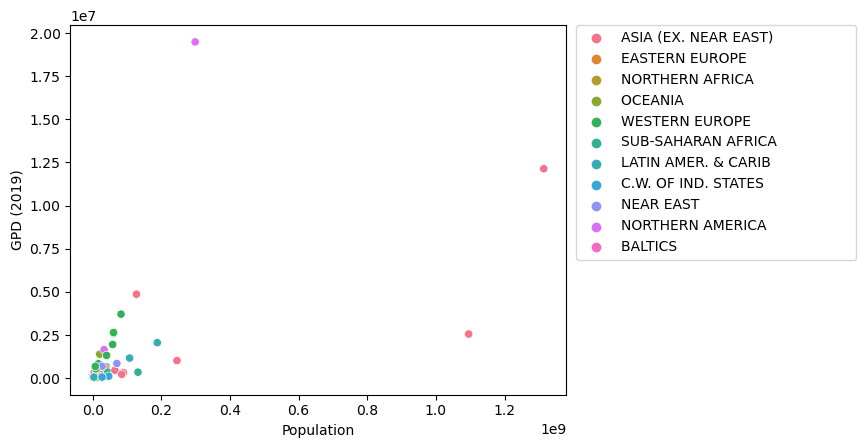

In [82]:
sns.scatterplot(data=agg_pd,x='Population',y='GPD (2019)', hue='Region')
#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

### Unemployment vs. GDP

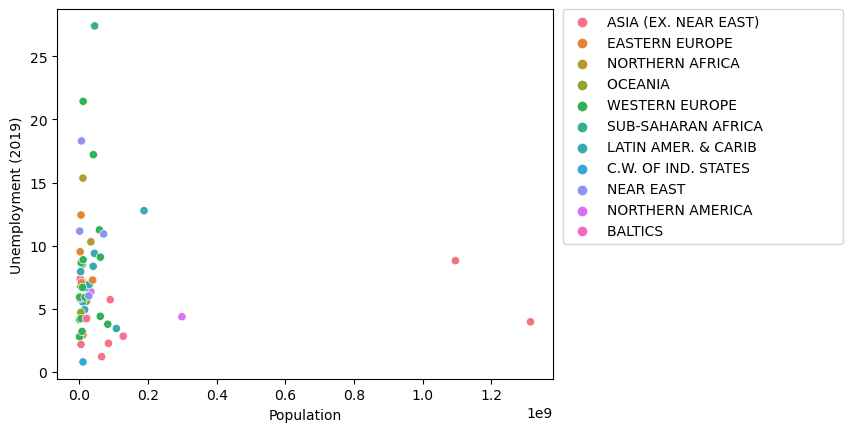

In [83]:
#agg_pd.plot.scatter(x='Population',y='Unemployment (2019)')

sns.scatterplot(data=agg_pd,x='Population',y='Unemployment (2019)', hue='Region')
#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

### Median GDP per capita, Literacy Rate, and Agriculture by Region

In [84]:
agg_pd.groupby('Region')[['GDP ($ per capita)', 'Literacy (%)', 'Agriculture']].median()

,GDP ($ per capita),Literacy (%),Agriculture
Region,,,
ASIA (EX. NEAR EAST),3450.0,90.60,0.1610
BALTICS,11400.0,99.80,0.0400
C.W. OF IND. STATES,3450.0,99.05,0.1980
EASTERN EUROPE,9100.0,98.60,0.0815
LATIN AMER. & CARIB,6300.0,94.05,0.0700
NEAR EAST,9250.0,83.00,0.0350
NORTHERN AFRICA,6000.0,70.00,0.1320
NORTHERN AMERICA,29800.0,97.50,0.0100
OCEANIA,5000.0,95.00,0.1505


### Cross-correlation matrix

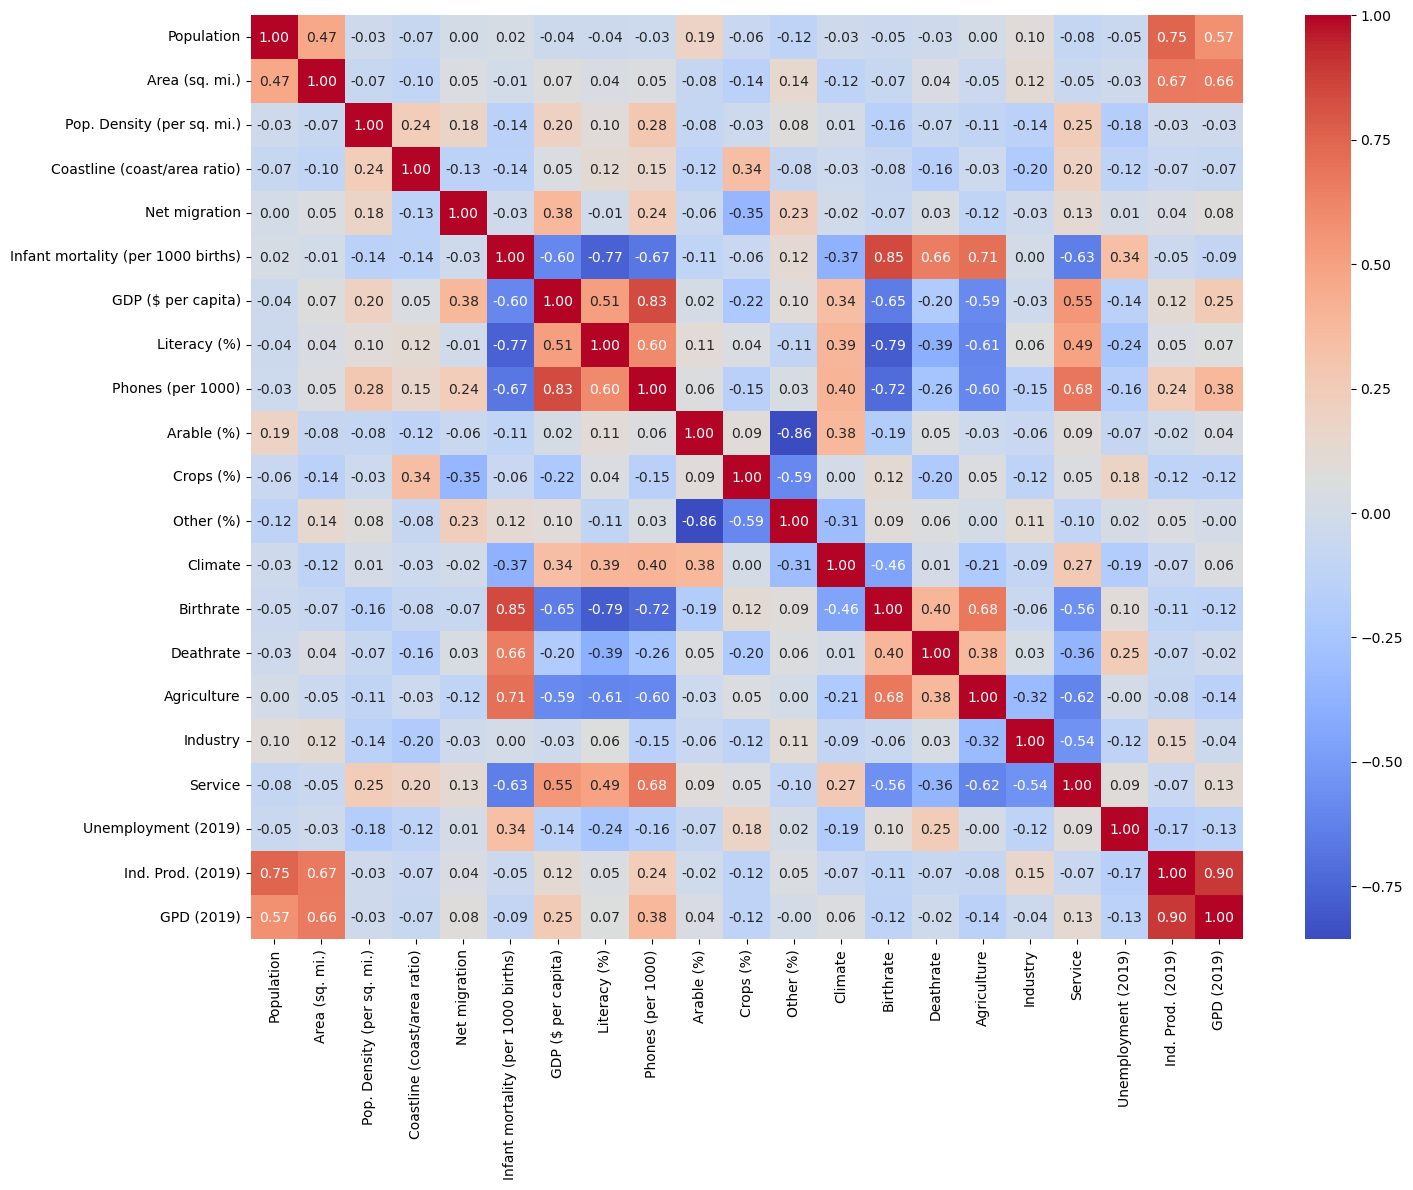

In [85]:
plt.figure(figsize=(16,12))
sns.heatmap(data=agg_pd.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

### GDP ($ per capita) by Country ###

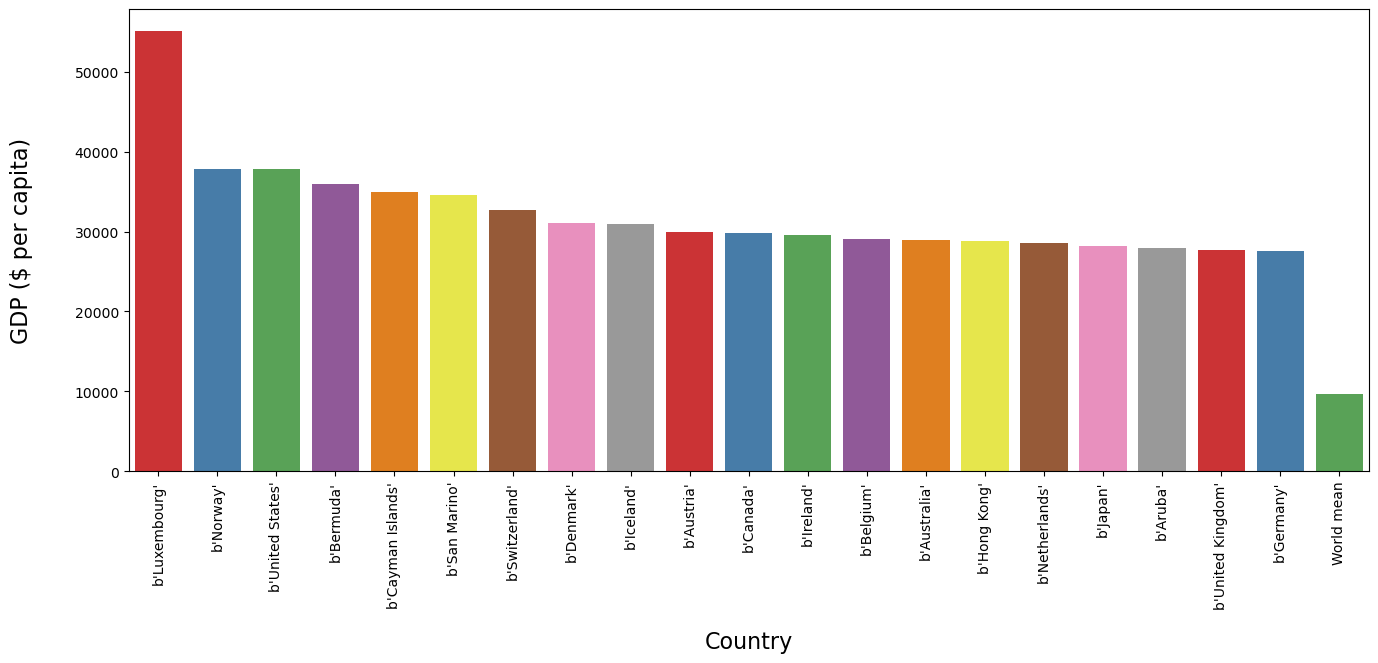

In [86]:
fig, ax = plt.subplots(figsize=(16,6))
top_gdp_countries = agg_pd.sort_values('GDP ($ per capita)',ascending=False).head(20)
mean = pd.DataFrame({'Country':['World mean'], 'GDP ($ per capita)':[agg_pd['GDP ($ per capita)'].mean()]})
gdps = pd.concat([top_gdp_countries[['Country','GDP ($ per capita)']],mean],ignore_index=True)
sns.barplot(x='Country', y='GDP ($ per capita)', data=gdps, palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

### Pair-wise scatter plots and correlations

C:\Users\rinab\AppData\Local\Temp\ipykernel_21772\5886056.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  corr_to_gdp = pd.Series()


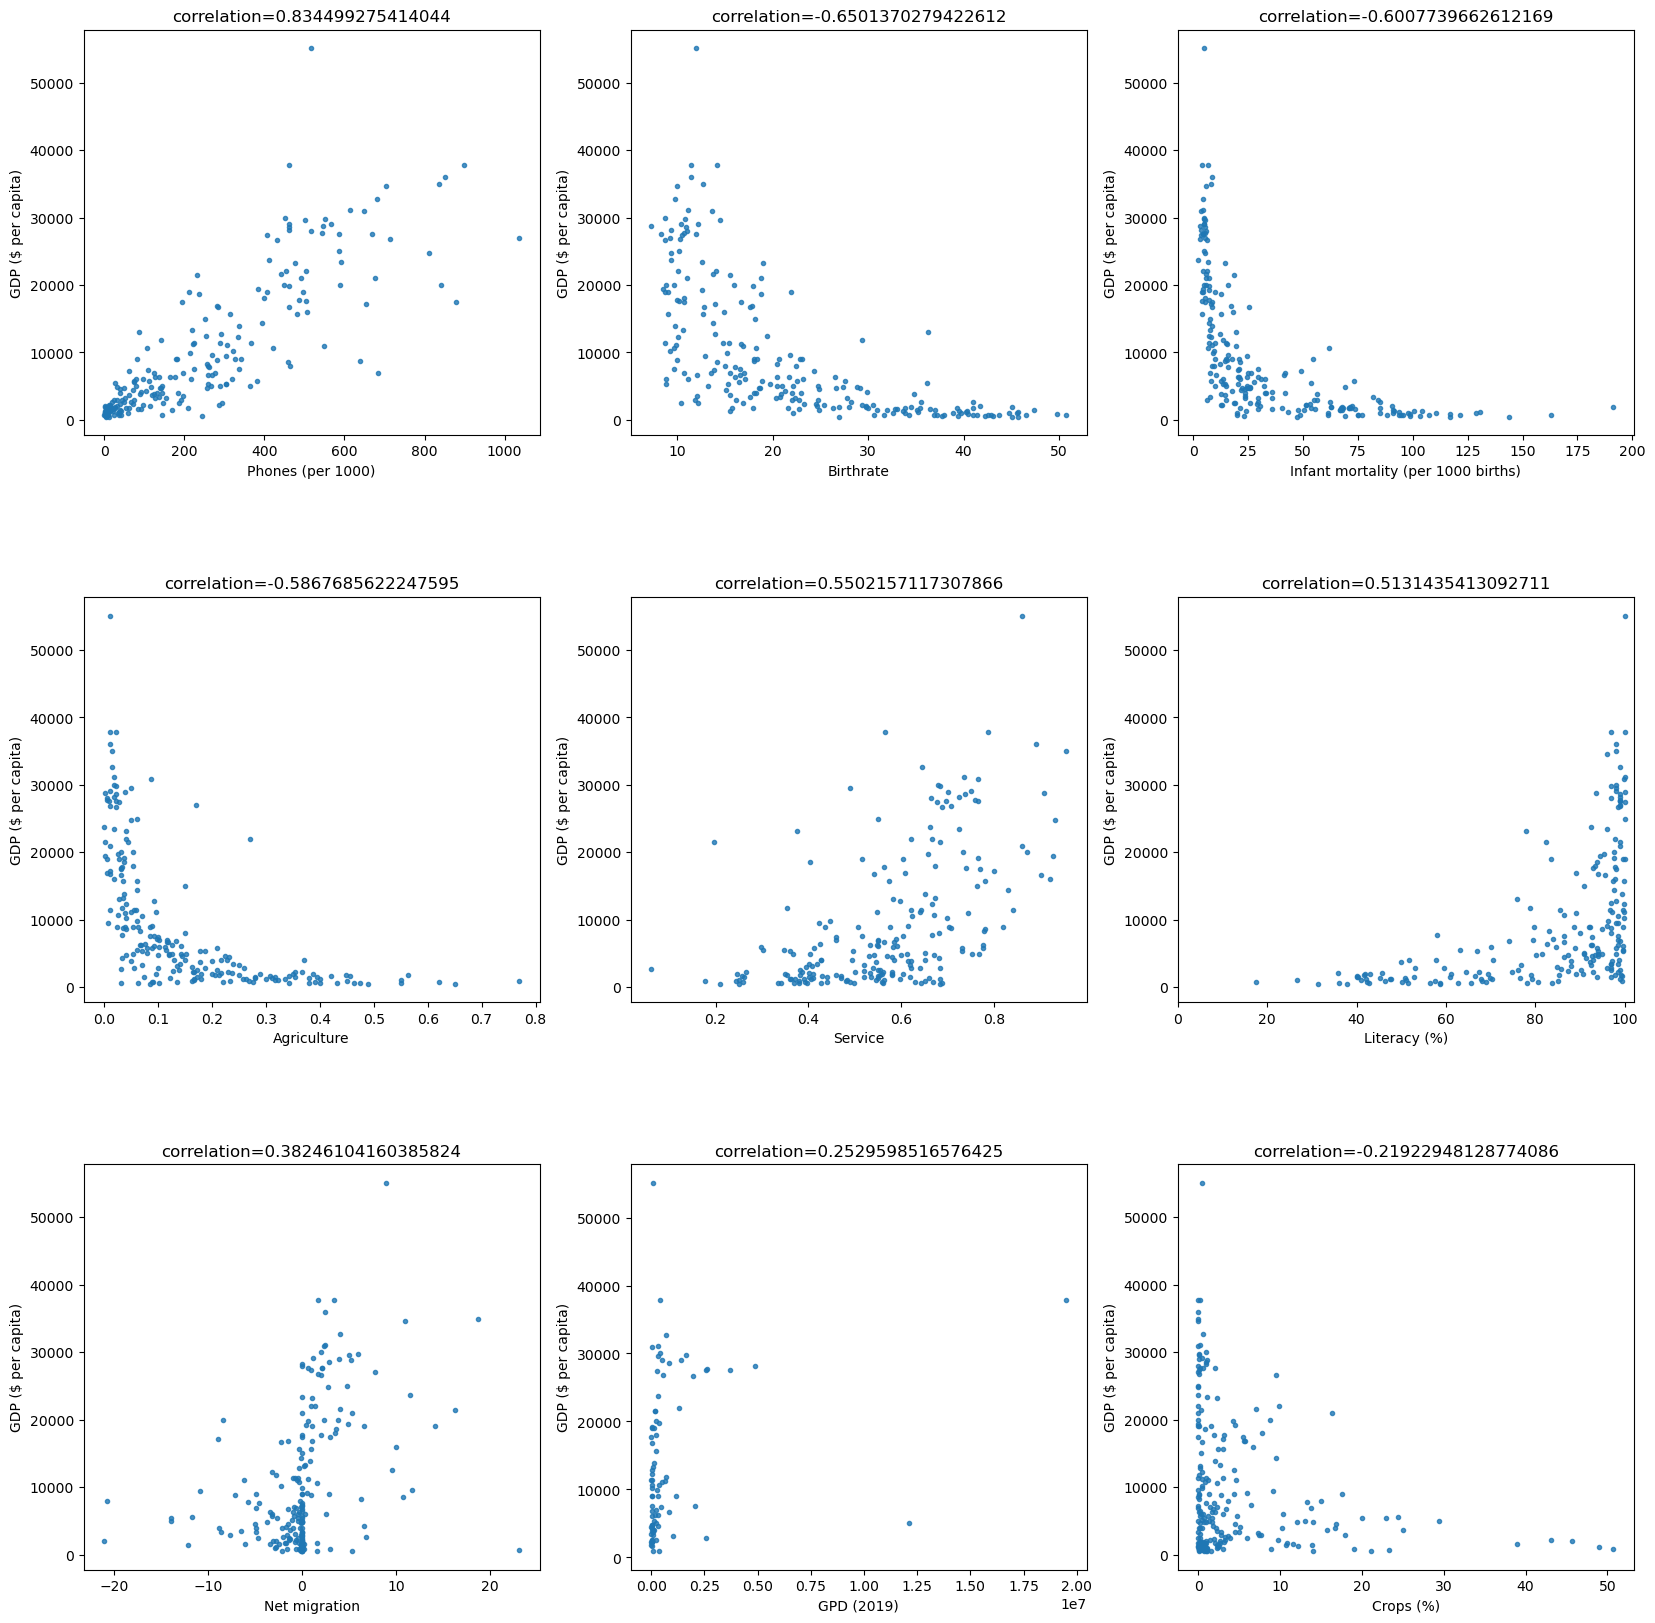

In [87]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
plt.subplots_adjust(hspace=0.4)

corr_to_gdp = pd.Series()
for col in agg_pd.columns.values[2:]:
    if ((col!='GDP ($ per capita)')&(col!='Climate')):
        corr_to_gdp[col] = agg_pd['GDP ($ per capita)'].corr(agg_pd[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(3):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='GDP ($ per capita)', data=agg_pd,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

## Next

Finally, the processed, cleaned, and transformed data can be stored in any data warehouse or mart for reporting etc.

Sources & References:

(1) https://www.kaggle.com/code/stieranka/predicting-gdp-world-countries

(2) https://www.kaggle.com/datasets/fernandol/countries-of-the-world

(3) https://www.kaggle.com/datasets/theworldbank/global-economic-monitor